# PCA to cancer dataset

In [10]:
import numpy as np
import matplotlib.pyplot as pl
import mglearn
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

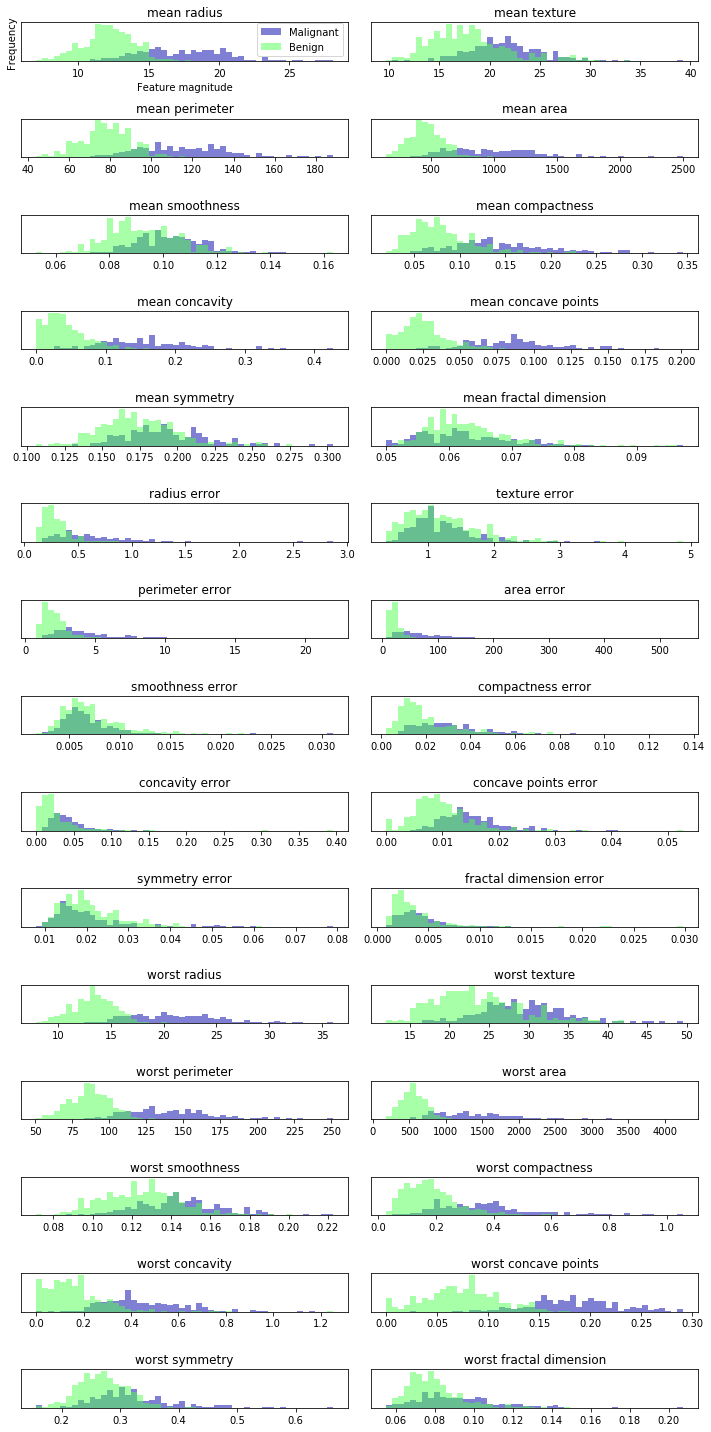

In [47]:
fig,axes=pl.subplots(15,2,figsize=(10,20))
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]
ax=axes.ravel()
for i in range(30):
    _,bins=np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel('Feature magnitude')
ax[0].set_ylabel('Frequency')
ax[0].legend(['Malignant','Benign'],loc='best')
fig.tight_layout()

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [50]:
scaler.fit(cancer.data)
X_scaled=scaler.transform(cancer.data)